In [2]:
from pymongo import MongoClient
import pandas as pd
from pprint import pprint 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
mongo = MongoClient(port=27017)

In [4]:
print(mongo.list_database_names())

['Homework1', 'Project_3', 'admin', 'classDB', 'config', 'fruits_db', 'local', 'met', 'petsitly_marketing', 'uk_food']


In [5]:
db = mongo['Project_3']

In [6]:
print(db.list_collection_names())

['video_games', 'video_game_sales']


In [7]:
video_games = db['video_games']

In [8]:
pprint(db.video_games.find_one())

{'_id': ObjectId('6583d28ab91a3d86a9e22029'),
 'name': 'The Legend of Zelda: Ocarina of Time',
 'platform': ' Nintendo 64',
 'release_date': '23-Nov-98',
 'summary': 'As a young boy, Link is tricked by Ganondorf, the King of the '
            'Gerudo Thieves. The evil human uses Link to gain access to the '
            'Sacred Realm, where he places his tainted hands on Triforce and '
            'transforms the beautiful Hyrulean landscape into a barren '
            'wasteland. Link is determined to fix the problems he helped to '
            'create, so with the help of Rauru he travels through time '
            'gathering the powers of the Seven Sages.',
 'user_review': 9.1}


In [9]:
count_tbd = video_games.count_documents({'user_review': 'tbd'})

print(f"Number of documents where user_review is 'tbd': {count_tbd}")

Number of documents where user_review is 'tbd': 0


In [10]:
# Delete documents with user_review equal to "tbd"
result = video_games.delete_many({'user_review': 'tbd'})
print(f"{result.deleted_count} documents deleted")
# Now, retrieve the remaining documents and perform aggregation
pipeline = [
    {
        '$group': {
            '_id': '$name',
            'mean_user_review': {'$avg': '$user_review'}
        }
    }
]

result_after_deletion = list(video_games.aggregate(pipeline))

for item in result_after_deletion[:5]:
    pprint(item)

0 documents deleted
{'_id': 'Poison Control', 'mean_user_review': 8.0}
{'_id': 'Baseball Advance', 'mean_user_review': 7.8}
{'_id': 'RACE On', 'mean_user_review': 7.5}
{'_id': "The King of Fighters '98 Ultimate Match", 'mean_user_review': 8.8}
{'_id': 'The TakeOver', 'mean_user_review': 8.0}


In [11]:
documents_with_tbd = video_games.find({'user_review': 'tbd'})

# Print or process the matching documents
for document in documents_with_tbd:
    print(document)

In [12]:
cleaned_df = pd.DataFrame(result_after_deletion)
cleaned_df.head(15)

,_id,mean_user_review
0,Poison Control,8.000000
1,Baseball Advance,7.800000
2,RACE On,7.500000
3,The King of Fighters '98 Ultimate Match,8.800000
4,The TakeOver,8.000000
5,Hyperdimension Neptunia Re;Birth3: V Generation,7.200000
6,Mega Man Zero 3,8.800000
7,Genesis Alpha One,4.400000
8,State of Emergency 2,6.000000
9,Onimusha Blade Warriors,7.000000


In [13]:
cleaned_df['mean_user_review'] = cleaned_df['mean_user_review'].round(2)
cleaned_df = cleaned_df.rename(columns={'_id': 'Video Game'})
cleaned_df = cleaned_df.rename(columns={'mean_user_review': 'Average Rating'})

cleaned_df.head(15)

,Video Game,Average Rating
0,Poison Control,8.00
1,Baseball Advance,7.80
2,RACE On,7.50
3,The King of Fighters '98 Ultimate Match,8.80
4,The TakeOver,8.00
5,Hyperdimension Neptunia Re;Birth3: V Generation,7.20
6,Mega Man Zero 3,8.80
7,Genesis Alpha One,4.40
8,State of Emergency 2,6.00
9,Onimusha Blade Warriors,7.00


In [14]:
top_games = cleaned_df.sort_values(by='Average Rating', ascending=False)
top_games.head(15)

,Video Game,Average Rating
8298,Tengami,9.70
4206,Metal Torrent,9.70
5518,Z.H.P. Unlosing Ranger vs Darkdeath Evilman,9.70
602,GrimGrimoire,9.70
5881,Ghost Trick: Phantom Detective,9.70
1765,Diaries of a Spaceport Janitor,9.60
10529,Crystar,9.60
4859,Astro's Playroom,9.30
6098,The Witcher 3: Wild Hunt,9.27
1564,Fallout 2,9.20


In [15]:
bottom_games = cleaned_df.sort_values(by='Average Rating', ascending=True)
bottom_games.head(15)

,Video Game,Average Rating
8318,Madden NFL 21,0.35
5024,Madden NFL 22,0.55
6630,Warcraft III: Reforged,0.60
7713,FIFA 20: Legacy Edition,0.70
6235,The Sims 4: Star Wars - Journey to Batuu,1.00
2228,When Ski Lifts Go Wrong,1.00
5386,FIFA 21,1.07
5056,Call of Duty: Modern Warfare 3 - Defiance,1.20
2096,Legends of Pegasus,1.30
8776,FIFA 20,1.30


In [16]:
print(db.list_collection_names())

['video_games', 'video_game_sales']


In [17]:
video_game_sales = db['video_game_sales']

In [18]:
pprint(db.video_game_sales.find_one())

{'EU_Sales': 29.02,
 'Genre': 'Sports',
 'Global_Sales': 82.74,
 'JP_Sales': 3.77,
 'NA_Sales': 41.49,
 'Name': 'Wii Sports',
 'Other_Sales': 8.46,
 'Platform': 'Wii',
 'Publisher': 'Nintendo',
 'Rank': 1,
 'Year': 2006,
 '_id': ObjectId('6583df31d2f6bf77a80099b2')}


In [19]:
pipeline = [
    {
        '$group': {
            '_id': '$Name',
            'Total Global Sales': {'$sum': '$Global_Sales'}
        }
    }
]

global_sales = list(video_game_sales.aggregate(pipeline))

for item in global_sales[:5]:
    pprint(item)

{'Total Global Sales': 0.01, '_id': 'Real Crimes: The Unicorn Killer'}
{'Total Global Sales': 0.06, '_id': 'Winx Club: Quest for the Codex'}
{'Total Global Sales': 5.67,
 '_id': 'The Lord of the Rings: The Return of the King'}
{'Total Global Sales': 23.42, '_id': 'Mario Kart DS'}
{'Total Global Sales': 5.779999999999999, '_id': 'Mass Effect 3'}


In [20]:
global_df = pd.DataFrame(global_sales)
cleaned_sales_df = global_df.rename(columns={'_id': 'Video Game'})
top_sales = cleaned_sales_df.sort_values(by='Total Global Sales', ascending=False)
top_sales.head(15)

,Video Game,Total Global Sales
7358,Wii Sports,82.74
2567,Grand Theft Auto V,55.92
836,Super Mario Bros.,45.31
10998,Tetris,35.84
9804,Mario Kart Wii,35.82
4602,Wii Sports Resort,33.00
4183,Pokemon Red/Pokemon Blue,31.37
10916,Call of Duty: Black Ops,31.03
6499,Call of Duty: Modern Warfare 3,30.83
8511,New Super Mario Bros.,30.01


In [21]:
pipeline2 = [
    {
        '$group': {
            '_id': '$Genre',
            'Total Global Sales': {'$sum': '$Global_Sales'}
        }
    }
]

per_category = list(video_game_sales.aggregate(pipeline2))

for item in per_category[:5]:
    pprint(item)

{'Total Global Sales': 831.37, '_id': 'Platform'}
{'Total Global Sales': 732.04, '_id': 'Racing'}
{'Total Global Sales': 809.96, '_id': 'Misc'}
{'Total Global Sales': 244.95, '_id': 'Puzzle'}
{'Total Global Sales': 1037.37, '_id': 'Shooter'}


In [22]:
global_df_per_catergory = pd.DataFrame(per_category)
cleaned_sales_df_category = global_df_per_catergory.rename(columns={'_id': 'Video Game'})
top_sales_per_category = cleaned_sales_df_category.sort_values(by='Total Global Sales', ascending=False)
top_sales_per_category.head(15)

,Video Game,Total Global Sales
6,Action,1751.18
11,Sports,1330.93
4,Shooter,1037.37
9,Role-Playing,927.37
0,Platform,831.37
2,Misc,809.96
1,Racing,732.04
7,Fighting,448.91
5,Simulation,392.20
3,Puzzle,244.95


In [23]:
merged_df = pd.merge(cleaned_df, cleaned_sales_df, on='Video Game')
# Print the merged DataFrame
merged_df.head(15)

,Video Game,Average Rating,Total Global Sales
0,Baseball Advance,7.80,0.13
1,RACE On,7.50,0.03
2,The King of Fighters '98 Ultimate Match,8.80,0.12
3,Mega Man Zero 3,8.80,0.22
4,State of Emergency 2,6.00,0.08
5,Top Spin 3,6.97,1.86
6,Battalion Wars,8.60,0.40
7,Metroid Prime 3: Corruption,8.80,1.82
8,Rogue Ops,8.50,0.41
9,X3: Terran Conflict,7.90,0.03


In [24]:
top_rating_merged = merged_df.sort_values(by='Average Rating', ascending=False)
top_rating_merged.head(15)

,Video Game,Average Rating,Total Global Sales
247,GrimGrimoire,9.70,0.05
2246,Ghost Trick: Phantom Detective,9.70,0.42
2330,The Witcher 3: Wild Hunt,9.27,5.64
1210,Suikoden II,9.20,0.68
2052,Deus Ex,9.20,0.01
2424,The Last of Us,9.20,10.54
1288,Planescape: Torment,9.20,0.04
1081,Warcraft III: The Frozen Throne,9.20,1.54
3738,Metal Gear Solid 3: Snake Eater,9.20,4.23
2709,Xenogears,9.20,1.46


In [25]:
top_sales_merged = merged_df.sort_values(by='Total Global Sales', ascending=False)
top_sales_merged.head(15)

,Video Game,Average Rating,Total Global Sales
3146,Wii Sports,8.10,82.74
600,Grand Theft Auto V,8.14,55.92
4024,Tetris,7.50,35.84
3282,Mario Kart Wii,8.40,35.82
2145,Wii Sports Resort,8.20,33.00
3963,Call of Duty: Black Ops,6.36,31.03
2548,Call of Duty: Modern Warfare 3,2.92,30.83
2839,New Super Mario Bros.,8.50,30.01
1427,Call of Duty: Black Ops II,5.65,29.72
411,Wii Play,6.60,29.02


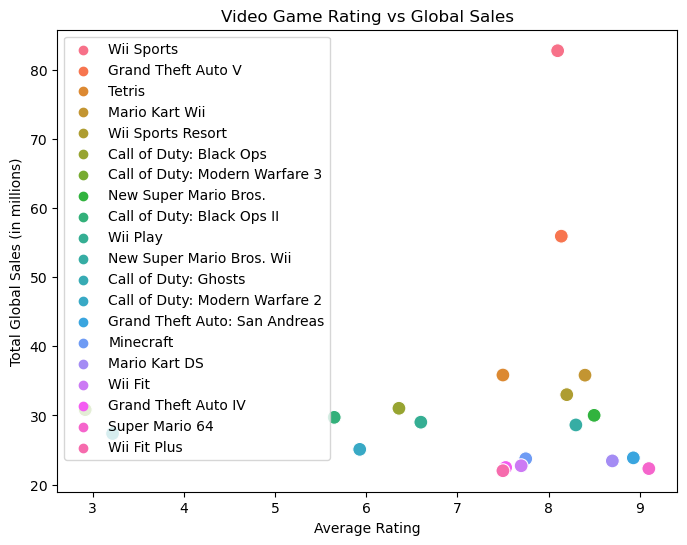

In [26]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Average Rating', y='Total Global Sales', data=top_sales_merged.head(20), hue='Video Game', s=100)

# Add labels and title
plt.title('Video Game Rating vs Global Sales')
plt.xlabel('Average Rating')
plt.ylabel('Total Global Sales (in millions)')

# Display legend
plt.legend()
# Show the plot
plt.show()

In [28]:
fig = px.scatter(top_sales_merged.head(20), x='Average Rating', y='Total Global Sales',
                 title='Video Game Rating vs Global Sales',
                 labels={'Average Rating': 'Average Rating', 'Total Global Sales': 'Total Global Sales'},
                 hover_name='Video Game', size_max=60)
fig.update_layout(
    showlegend=False,  # Remove the legend
    margin=dict(l=0, r=0, t=30, b=0),  # Adjust margin
)
# Show the plot
fig.show()